In [3]:
#standard ds libraries
import pandas as pd
import numpy as np

# my acquire and prepare file
import acquire
import prepare


# import splitting functions
from sklearn.model_selection import train_test_split

In [ ]:
# 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets)
# containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = data('iris')
df_iris.info()
# data('iris', show_doc=True) 

In [ ]:
# print the first 3 rows
print(df_iris.head(3))

In [ ]:
# print the number of rows and columns (shape)
print(df_iris.shape)

In [ ]:
# print the column names
print(df_iris.columns)
o# or df_iris.columns.to_list()

In [ ]:
# print the data type of each column
print(df_iris.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
print(df_iris.describe().T) #.T transposes it for better readability

### # 5. Read the data from this google sheet into a dataframe, df_google.

In [ ]:
# Read the data from this google sheet into a dataframe, df_google.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

In [ ]:
df_google.info()

In [ ]:
#Print the first 3 rows
print(df_google.head(3))

In [ ]:
# print the number of rows and columns
print(df_google.shape)

In [ ]:
# print the column names
print(df_google.columns)

In [ ]:
# print the data type of each column
print(df_google.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
print(df_google.describe())

In [ ]:
# print the unique values for each of your categorical variables
df_google.Survived.value_counts(dropna=False)
df_google.Name.value_counts(dropna=False)
df_google.Sex.value_counts(dropna=False)
df_google.Cabin.value_counts(dropna=False)
df_google.Embarked.value_counts(dropna=False)

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel("train.xlsx", sheet_name='train')
print(df_excel.head())

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
print(df_excel_sample.head())

In [ ]:
# print the number of rows of your original dataframe
print(len(df_excel)) #or df_excel.shape[0]

In [ ]:
# print the first 5 column names
df_excel.columns[:5]

In [ ]:
# print the column names that have a data type of object
object_columns = df_excel.select_dtypes(include=['object']).head()
object_columns

In [ ]:
# compute the range for each of the numeric variables.
titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats['range'] = titanic_stats['max'] -titanic_stats['min']
titanic_stats

#### Make a new python module, acquire.py to hold the following data aquisition functions:

In [ ]:
# Make a function named get_titanic_data that returns the titanic data from the codeup
# data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

import env

def get_titanic_data():
    url = env.get_db_url('titanic_db')
    
    return pd.read_sql('SELECT * FROM passengers', url)

get_titanic_data()

In [ ]:
# Make a function named get_iris_data that returns the data from the iris_db on the codeup
# data science database as a pandas data frame. The returned data frame should include the 
# actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.
from env import user, password, host

#url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'

def get_iris_data():
    from env import user, password, host
    url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'
    url = env.get_db_url('iris_db')
    return pd.read_sql('SELECT * FROM measurements JOIN iris_db.species USING(species_id)', url)

In [ ]:
get_iris_data()

In [ ]:
# Make a function named get_telco_data that returns the data from the telco_churn database in SQL. 
# In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with 
# the customers table, so that the resulting dataframe contains all the contract, payment, 
# and internet service options. Obtain your data from the Codeup Data Science Database.

def get_telco_data():
    from env import user, password, host
    url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
    url = env.get_db_url('telco_churn')
    return pd.read_sql('SELECT * FROM customers\
    JOIN telco_churn.contract_types USING(contract_type_id)\
    JOIN telco_churn.internet_service_types USING(internet_service_type_id)\
    JOIN telco_churn.payment_types USING(payment_type_id)', url)

get_telco_data()

#### Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [ ]:
def get_titanic_data():
    filename = "titanic.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        url = env.get_db_url('titanic_db')
        return pd.read_sql('SELECT * FROM passengers', url)
    
titanic_df = get_titanic_data()
titanic_df.to_csv("titanic.csv")

In [ ]:
def get_iris_data():
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        from env import user, password, host
        url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'
        url = env.get_db_url('iris_db')
        return pd.read_sql('SELECT * FROM measurements JOIN iris_db.species USING(species_id)', url)

iris_df = get_iris_data()
iris_df.to_csv("iris.csv")

In [ ]:
def get_telco_data():
    filename = "telco.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        from env import user, password, host
        url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
        url = env.get_db_url('telco_churn')
        return pd.read_sql('SELECT * FROM customers\
        JOIN telco_churn.contract_types USING(contract_type_id)\
        JOIN telco_churn.internet_service_types USING(internet_service_type_id)\
        JOIN telco_churn.payment_types USING(payment_type_id)', url)

telco_df = get_telco_data()
telco_df.to_csv("telco.csv")

In [ ]:
#Use import acquire to get these functions from other notebooks

## Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

## Using the Iris Data

In [ ]:
# 1. Use the function defined in acquire.py to load the iris data.
iris_df = acquire.get_iris_data()

In [ ]:
iris_df.head()

In [ ]:
# 2. Drop the species_id and measurement_id columns.
iris_df.shape

In [ ]:
columns_to_drop = ['species_id', 'measurement_id']
iris_df = iris_df.drop(columns = columns_to_drop)

In [ ]:
iris_df.head()

In [ ]:
# 3. Rename the species_name column to just species.
iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df.head()

In [ ]:
# 4. Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, but if we used species 
# as a feature, we would need to encode it).
# Using drop_first leaves sex_male, embark_town_Queenstown, and embark_town_Southampton.

dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=True)
dummy_df.head()

In [ ]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df.head()

In [ ]:
# 5 Create a function named prep_iris that accepts the untransformed iris data, and returns the data
# with the transformations above applied.
def prep_iris(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    #rename column
    df = df.rename(columns={'species_name': 'species'})
    # Drop columns 
    columns_to_drop = ['species_id', 'measurement_id']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [ ]:
df.head()

In [ ]:
df = acquire.get_iris_data()
prep_iris(df)

## Using the Titanic dataset

In [ ]:
#1 Use the function defined in acquire.py to load the Titanic data.
titanic_df = acquire.get_titanic_data()
titanic_df.head()

In [ ]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns.
titanic_df.shape

In [ ]:
titanic_df.info()

In [ ]:
columns_to_drop = ['embarked', 'pclass', 'passenger_id', 'deck']
titanic_df = titanic_df.drop(columns = columns_to_drop) 
titanic_df.head()

In [ ]:
# Encode the categorical columns. Create dummy variables of the categorical columns and 
# concatenate them onto the dataframe.
dummy_df = pd.get_dummies(titanic_df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

In [ ]:
# Concatenate my dummy_df to my data
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df

In [ ]:
# 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data
# with the transformations above applied.
def prep_titanic(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['embarked', 'pclass', 'passenger_id', 'deck']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [ ]:
df = acquire.get_titanic_data()
clean_titanic = prep_titanic(df)
clean_titanic.head()

## Using the Telco dataset

In [ ]:
#1 Use the function defined in acquire.py to load the Telco data.
telco_df = acquire.get_telco_data()
telco_df.head()

In [ ]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns
# but keeping the corresponding string values, for example.
telco_df.info()
telco_df.shape

In [ ]:
#dropping duplicates, None here
telco_df = telco_df.drop_duplicates()
telco_df.shape

In [ ]:
#dropping unneccessary columns
columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
telco_df = telco_df.drop(columns = columns_to_drop)

In [ ]:
telco_df.head()

In [ ]:
# 3 Encode the categorical columns. Create dummy variables of the categorical columns and concatenate
# them onto the dataframe.
# Creating a list of our numeric columns
numcols = [col for col in telco_df.columns if telco_df[col].dtype != 'O']
numcols

In [ ]:
# Creating a list of our categorical columns
catcols = [col for col in telco_df.columns if telco_df[col].dtype == 'O']
catcols

In [ ]:
dummy_df = pd.get_dummies(telco_df[[
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']], dummy_na=False, drop_first=[True, True])

In [ ]:
dummy_df.head()

In [ ]:
# 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the
# transformations above applied.
def prep_telco(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['gender','partner','dependents','phone_service', 'multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [ ]:
df = acquire.get_telco_data()

In [ ]:
df = prep_telco(df)

In [ ]:
df.head()

## Split your data

In [ ]:
import prepare

In [ ]:
#1 Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [ ]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

### 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [2]:
#Acquire iris data
df = acquire.get_iris_data()

In [3]:
#Prep iris data
df = prepare.prep_iris(df)

In [4]:
#Set target variable
target = 'species'

In [6]:
#Train test split
#from prepare import my_train_test_split
train_iris, validate_iris, test_iris = prepare.my_train_test_split(df, target)

In [9]:
#Check training datasets
train_iris.shape
test_iris.shape
validate_iris.shape

(90, 7)

### 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [1]:
#Acquire titanic data
df = acquire.get_titanic_data()

NameError: name 'acquire' is not defined

In [11]:
#Prep titanic data
df = prepare.prep_titanic(df)

In [12]:
#Set target variable
target = 'survived'

In [13]:
#Train test split
#from prepare import my_train_test_split
train_titanic, validate_titanic, test_titanic = prepare.my_train_test_split(df, target)

In [14]:
#Check training datasets
train_titanic.shape
test_titanic.shape
validate_titanic.shape

(178, 14)

### 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [15]:
#Acquire telco data
df = acquire.get_telco_data()

In [16]:
#Prep telco data
df = prepare.prep_telco(df)

In [17]:
target = 'churn'

In [18]:
#Train test split
train_telco, validate_telco, test_telco = prepare.my_train_test_split(df, target)

In [19]:
train_telco.shape

(4225, 48)

In [20]:
validate_telco.shape

(1409, 48)

In [21]:
test_telco.shape

(1409, 48)

# Explore Lesson Exercises

In [41]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [59]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [60]:
#Prepare iris data
iris_df = prepare.prep_iris(iris_df)

In [61]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [62]:
#Split iris data
#Set target variable
target = 'species'
train_iris, validate_iris, test_iris = prepare.my_train_test_split(iris_df, target)

### 2. Univariate Stats

In [45]:
##For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive
##statistics (using .describe()).
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
count,150.000000,150.000000,150.000000,150.000000,150,150.000000,150.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,setosa,NaN,NaN
freq,NaN,NaN,NaN,NaN,50,NaN,NaN
mean,5.843333,3.057333,3.758000,1.199333,NaN,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,NaN,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,NaN,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,NaN,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,NaN,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,NaN,1.000000,1.000000


In [46]:
iris_df.dtypes

sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species                object
species_versicolor      uint8
species_virginica       uint8
dtype: object

In [47]:
num_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_vars = ['species', 'species_versicolor', 'species_virginica']

species
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


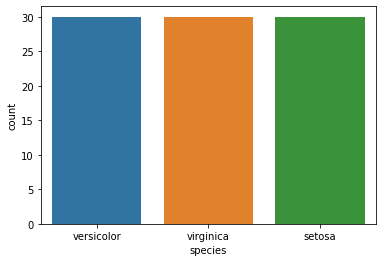

species_versicolor
0    60
1    30
Name: species_versicolor, dtype: int64
0    66.666667
1    33.333333
Name: species_versicolor, dtype: float64


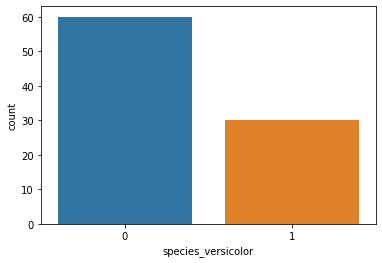

species_virginica
0    60
1    30
Name: species_virginica, dtype: int64
0    66.666667
1    33.333333
Name: species_virginica, dtype: float64


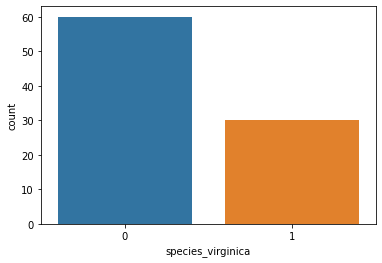

In [48]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
for col in cat_vars:
    print(col)
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_iris)
    plt.show()

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

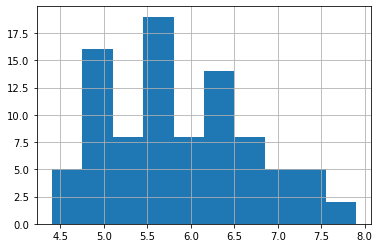

In [49]:
#sepal_length
train_iris.sepal_length.hist() #Appears to be fairly normally distributed
train_iris.sepal_length.describe()

<AxesSubplot:xlabel='sepal_length'>

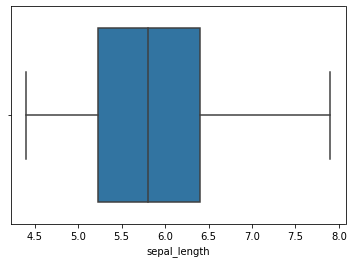

In [50]:
#sepal_length box plot
sns.boxplot(x='sepal_length', data=train_iris)

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64

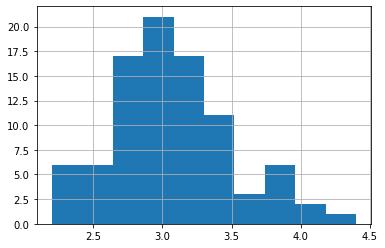

In [51]:
train_iris.sepal_width.hist() #appears to be a normal distribution
train_iris.sepal_width.describe()

<AxesSubplot:xlabel='sepal_width'>

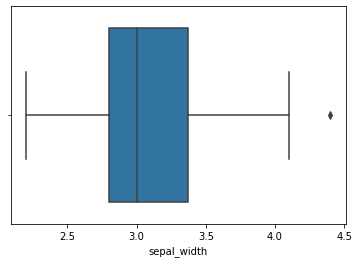

In [52]:
#sepal_width box plot
sns.boxplot(x='sepal_width', data=train_iris) #boxplot shows a fairly normal distribution, skewed slightly left

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

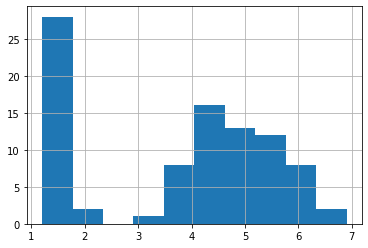

In [53]:
train_iris.petal_length.hist() #petal length appears skewed left
train_iris.petal_length.describe()

<AxesSubplot:xlabel='petal_length'>

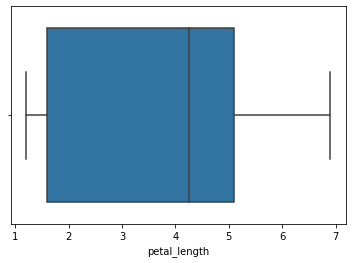

In [54]:
#petal_length box plot
sns.boxplot(x='petal_length', data=train_iris) #very wide distribution between 1st and 3rd quartile, skewed left

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

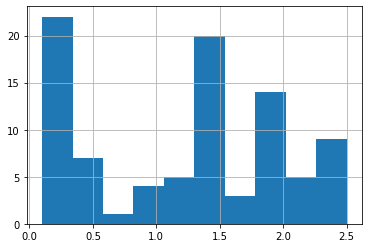

In [55]:
#petal_width descriptive statistics and histogram
train_iris.petal_width.hist() #not a normal distribution
train_iris.petal_width.describe()

<AxesSubplot:xlabel='petal_width'>

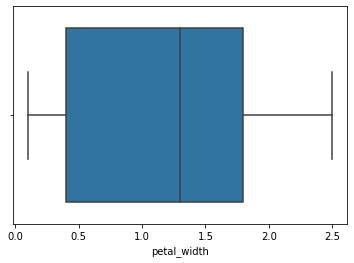

In [56]:
#petal width box plot
sns.boxplot(x='petal_width', data=train_iris) #petal_width appears skewed left

### Document takeaways & any actions.

In [40]:
###Sepal length and width appear to have more normal distributions for the train data set. 
###Petal length and petal width appear to be clustered in different areas, which could be explored further in
###species analysis

## 3. Bivariate Stats

#### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

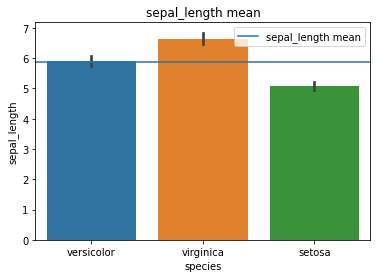

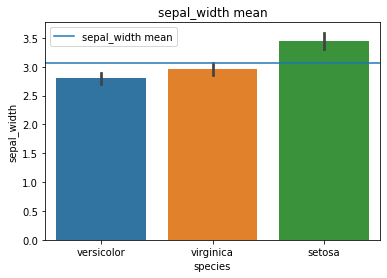

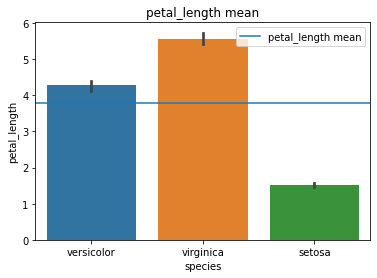

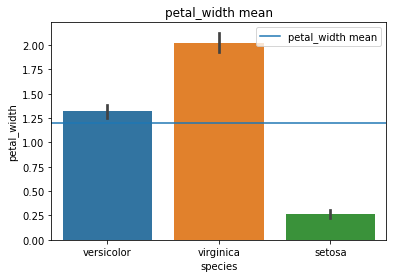

In [76]:
for col in num_vars:
    plt.title(f'{col} mean')
    sns.barplot(x='species', y = col, data = train_iris)
    pop_species_rate = train_iris[col].mean()
    plt.axhline(pop_species_rate, label = f'{col} mean')
    plt.legend()
    plt.show()

### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
1. State the hypotheses. 

H0: Virginica petal length are on average lower or equal to Versicolor petals
Ha: Virginica petals on average are significantly larger than Versicolor petals

In [77]:
# Choose significance level
alpha = 0.05

In [104]:
virginica = train_iris[train_iris.species == 'virginica']
virginica = virginica.petal_width
virginica

123    1.8
145    2.3
130    1.9
149    1.8
139    2.1
125    1.8
133    1.5
100    2.5
108    1.8
137    1.8
129    1.6
119    1.5
107    1.8
140    2.4
114    2.4
104    2.2
115    2.3
132    2.2
126    1.8
128    2.1
109    2.5
103    1.8
142    1.9
112    2.1
111    1.9
120    2.3
147    2.0
131    2.0
118    2.3
141    2.3
Name: petal_width, dtype: float64

In [105]:
versicolor = train_iris[train_iris.species == 'versicolor']
versicolor = versicolor.petal_width
versicolor

70    1.8
87    1.3
53    1.3
50    1.4
54    1.5
52    1.5
81    1.0
88    1.3
85    1.6
92    1.2
74    1.3
84    1.5
91    1.4
89    1.3
55    1.3
67    1.0
94    1.3
95    1.2
69    1.1
61    1.5
82    1.2
51    1.5
59    1.4
57    1.0
79    1.0
73    1.2
83    1.6
58    1.3
96    1.3
97    1.3
Name: petal_width, dtype: float64

In [106]:
#perform the Mann-Whitney U test
stats.mannwhitneyu(virginica, versicolor, alternative='two-sided')

MannwhitneyuResult(statistic=883.0, pvalue=1.274471779403707e-10)

In [107]:
#Automate this test
#Virginica
virginica = train_iris[train_iris.species == 'virginica']
# again, for versicolor
versicolor = train_iris[train_iris.species == 'versicolor']
# again, for setosa
setosa = train_iris[train_iris.species == 'setosa']
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(883.0, 6.372358897018535e-11)

In [108]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
767.0 1.3741209709595538e-06
------------------


Comparing sepal_width between virginica and versicolor
575.0 0.03185465204978467
------------------


Comparing petal_length between virginica and versicolor
892.5 3.014978965256525e-11
------------------


Comparing petal_width between virginica and versicolor
883.0 6.372358897018535e-11
------------------




In [ ]:
# Document takeaways & any actions.
# Virginica sepal length, sepal width, petal length, and petal width mean are significantly larger than versicolors in
# four listed variable values

## Multivariate stats

In [111]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 70 to 97
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        90 non-null     float64
 1   sepal_width         90 non-null     float64
 2   petal_length        90 non-null     float64
 3   petal_width         90 non-null     float64
 4   species             90 non-null     object 
 5   species_versicolor  90 non-null     uint8  
 6   species_virginica   90 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.4+ KB


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

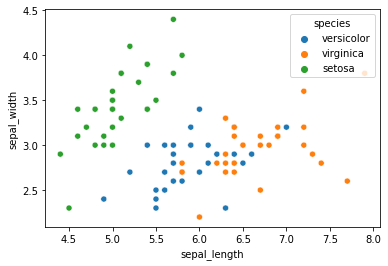

In [115]:
# Visualize the interaction of each measurement type with the others using a pairplot
#(or scatter matrix or something similar) and add color to represent species.
#Sepal Length vs width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=train_iris)